## Packages and Dataloading

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import h5py
import numpy as np
import pandas as pd
from tqdm import tqdm
import sys

import sklearn
import spikeinterface.full as si
import spikeinterface.curation as sc
import spikeinterface.widgets as sw

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image, display
import os


sys.path.append("C:/Users/elias/OneDrive - ETH Zurich/2025FS - Master Thesis/1 - Scripts/Github/DPQC")
import MaxTwo_Spikesorting.scripts.spike_sorting as ss


In [3]:
dataPath = '/net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/lkaupp/Dup15q/250429/T002513/ActivityScan/000007/data.raw.h5'
outputDir = '/net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/ehefti/Dup15q/Figures'

os.makedirs(outputDir, exist_ok=True)

## Recording Overview

In [ ]:
import matlab.engine
import os

eng = matlab.engine.start_matlab()
current_dir = os.getcwd()
matlab_function_path = os.path.join(current_dir, 'MaxTwo_Activity_Screening')
eng.addpath(eng.genpath(matlab_function_path))

saveDir = 'C:/Users/elias/OneDrive - ETH Zurich/2025FS - Master Thesis/1 - Scripts/Github/DPQC'

eng.screenActivity(dataPath, saveDir, nargout=0)

eng.quit()

MatlabExecutionError: Too many output arguments.


## Spikesorting

In [4]:
sorter = 'kilosort2_5'
si.Kilosort2_5Sorter.set_kilosort2_5_path('/home/ehefti/Github/Kilosort')
sorter_params = si.get_default_sorter_params(si.Kilosort2_5Sorter)
# print(sorter_params)
sorter_params['n_jobs'] = -1
sorter_params['detect_threshold'] = 5.5 #6 als Standardwert
# sorter_params['preclust_threshold'] = 5
# sorter_params['projection_threshold'] = [8, 4]
# sorter_params['AUCsplit'] = 0.8
sorter_params['minFR'] = 0.01 #Lower value -> less units that get automatically deleted
sorter_params['minfr_goodchannels'] = 0.01
sorter_params['keep_good_only'] = False
sorter_params['do_correction'] = False
sorter_params['NT'] = 64*1024 + 64 #Batch size -> Wieviel wird auf einmal angeschaut

Setting KILOSORT2_5_PATH environment variable for subprocess calls to: c:\home\ehefti\Github\Kilosort


In [8]:
# path = '/net/bs-filesvr02/export/group/hierlemann/recordings/Maxtwo/phornauer/241009/Torsten_2/T002523/Network/000002/data.raw.h5' 
# S:\group\hierlemann02\intermediate_data\Maxtwo\cmartins\Recordings\ST2036\ST2036E\240705\T002736\Network

path = 'S:/group/hierlemann02/recordings/Maxtwo/phornauer/241218/EI_iNeurons/T002523/Network/000020/data.raw.h5'
h5 = h5py.File(path)
stream_ids = list(h5['wells'].keys())
stream_ids = stream_ids[0:24]

save_root = 'D:/Master Thesis/Data/EI_iNeurons/241218/T002523/Network'

In [ ]:
for stream_id in tqdm(stream_ids):
    h5 = h5py.File(path)
    rec_name = list(h5['wells'][stream_id].keys())[0]
    rec = si.MaxwellRecordingExtractor(path, stream_id=stream_id, rec_name=rec_name)
    ss.clean_sorting(rec, save_root, stream_id=stream_id, sorter=sorter, sorter_params=sorter_params, clear_files=True)

  0%|                                                                                                                                        | 0/23 [00:00<?, ?it/s]

DURATION: 1800.02 s -- NUM. CHANNELS: 1002


write_binary_recording (workers: 8 processes):   0%|          | 0/1801 [00:00<?, ?it/s]

RUNNING SHELL SCRIPT: /net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/ehefti/Dup15q/250429/T003104/Network/well001/sorter_output/run_kilosort2_5.sh


                            < M A T L A B (R) >

                  Copyright 1984-2024 The MathWorks, Inc.

                  R2024b (24.2.0.2712019) 64-bit (glnxa64)

                              August 22, 2024



 

To get started, type doc.

For product information, visit www.mathworks.com.

 

Time   0s. Computing whitening matrix.. 

Getting channel whitening matrix... 

Channel-whitening matrix computed. 

Time  26s. Loading raw data and applying filters... 

Time 814s. Finished preprocessing 275 batches. 

Drift correction DISABLED

pitch is 1.750000e+01 um

0.79 sec, 1 batches, 2273 spikes 

171.66 sec, 101 batches, 227940 spikes 

341.57 sec, 201 batches, 454118 spikes 

468.62 sec, 275 batches, 620501 spikes 

time 472.99, Skipped shifting 275 batches. 

Time 476s. Optimizing templates ...

476.80 sec, 1 / 2

  4%|█████▎                                                                                                                     | 1/23 [40:03<14:41:21, 2403.72s/it]

DURATION: 1800.02 s -- NUM. CHANNELS: 995


write_binary_recording (workers: 8 processes):   0%|          | 0/1801 [00:00<?, ?it/s]

RUNNING SHELL SCRIPT: /net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/ehefti/Dup15q/250429/T003104/Network/well002/sorter_output/run_kilosort2_5.sh


                            < M A T L A B (R) >

                  Copyright 1984-2024 The MathWorks, Inc.

                  R2024b (24.2.0.2712019) 64-bit (glnxa64)

                              August 22, 2024



 

To get started, type doc.

For product information, visit www.mathworks.com.

 

Time   0s. Computing whitening matrix.. 

Getting channel whitening matrix... 

Channel-whitening matrix computed. 

Time  28s. Loading raw data and applying filters... 

Time 796s. Finished preprocessing 275 batches. 

Drift correction DISABLED

pitch is 1.750000e+01 um

0.74 sec, 1 batches, 1909 spikes 

169.65 sec, 101 batches, 184726 spikes 

338.81 sec, 201 batches, 364489 spikes 

465.61 sec, 275 batches, 496303 spikes 

time 470.15, Skipped shifting 275 batches. 

Time 473s. Optimizing templates ...

475.14 sec, 1 / 2

  9%|██████████▌                                                                                                              | 2/23 [1:15:31<13:04:33, 2241.59s/it]

DURATION: 1800.02 s -- NUM. CHANNELS: 999


write_binary_recording (workers: 8 processes):   0%|          | 0/1801 [00:00<?, ?it/s]

RUNNING SHELL SCRIPT: /net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/ehefti/Dup15q/250429/T003104/Network/well003/sorter_output/run_kilosort2_5.sh


                            < M A T L A B (R) >

                  Copyright 1984-2024 The MathWorks, Inc.

                  R2024b (24.2.0.2712019) 64-bit (glnxa64)

                              August 22, 2024



 

To get started, type doc.

For product information, visit www.mathworks.com.

 

Time   0s. Computing whitening matrix.. 

Getting channel whitening matrix... 

Channel-whitening matrix computed. 

Time  28s. Loading raw data and applying filters... 

Time 806s. Finished preprocessing 275 batches. 

Drift correction DISABLED

pitch is 1.750000e+01 um

0.75 sec, 1 batches, 2492 spikes 

171.21 sec, 101 batches, 249316 spikes 

341.70 sec, 201 batches, 493182 spikes 

468.64 sec, 275 batches, 670636 spikes 

time 473.07, Skipped shifting 275 batches. 

Time 477s. Optimizing templates ...

477.27 sec, 1 / 2

 13%|███████████████▊                                                                                                         | 3/23 [1:51:33<12:15:03, 2205.15s/it]

DURATION: 1800.02 s -- NUM. CHANNELS: 1008


write_binary_recording (workers: 8 processes):   0%|          | 0/1801 [00:00<?, ?it/s]

RUNNING SHELL SCRIPT: /net/bs-filesvr02/export/group/hierlemann/intermediate_data/Maxtwo/ehefti/Dup15q/250429/T003104/Network/well004/sorter_output/run_kilosort2_5.sh


                            < M A T L A B (R) >

                  Copyright 1984-2024 The MathWorks, Inc.

                  R2024b (24.2.0.2712019) 64-bit (glnxa64)

                              August 22, 2024



 

To get started, type doc.

For product information, visit www.mathworks.com.

 

Time   0s. Computing whitening matrix.. 

Getting channel whitening matrix... 

Channel-whitening matrix computed. 

Time  26s. Loading raw data and applying filters... 

Time 766s. Finished preprocessing 275 batches. 

Drift correction DISABLED

pitch is 1.750000e+01 um

0.75 sec, 1 batches, 2370 spikes 

171.50 sec, 101 batches, 232683 spikes 

341.30 sec, 201 batches, 461219 spikes 

469.30 sec, 275 batches, 629739 spikes 

time 473.19, Skipped shifting 275 batches. 

Time 477s. Optimizing templates ...

477.44 sec, 1 / 2

 17%|█████████████████████                                                                                                    | 4/23 [2:26:40<11:26:02, 2166.44s/it]

DURATION: 1800.02 s -- NUM. CHANNELS: 998


write_binary_recording (workers: 8 processes):   0%|          | 0/1801 [00:00<?, ?it/s]

## Qualitycontrol

### Train Model

Projecting waveforms: 100%|██████████| 10/10 [00:00<00:00, 1527.98it/s]
Compute : spike_locations + spike_amplitudes (no parallelization): 100%|██████████| 10/10 [00:00<00:00, 167.06it/s]
calculate pc_metrics: 100%|██████████| 10/10 [00:00<00:00, 12.30it/s]


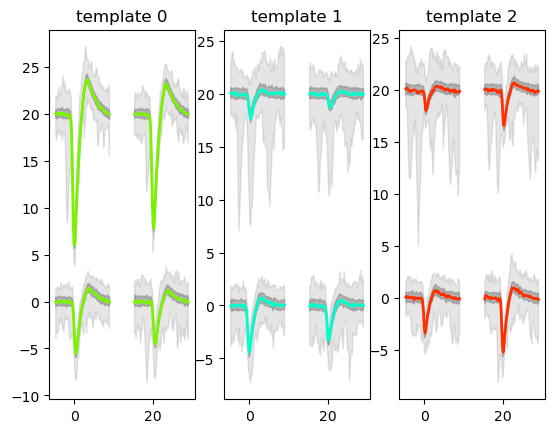

In [16]:
# Note, you can set the number of cores you use using e.g.
# si.set_global_job_kwargs(n_jobs = 8)

"""
# Choose sorting to train the model on
well_id = 'well001'
path_to_sorting = Path(save_root) / well_id / 'sorter_output'
sorting_train = si.read_kilosort(folder_path=path_to_sorting)

# Real Recording Loading
h5 = h5py.File(path)
rec_name = list(h5['wells'][well_id].keys())[0]
rec_train = si.MaxwellRecordingExtractor(path, stream_id=well_id, rec_name=rec_name)
"""

# For testing purposes
rec_train, sorting_1 = si.generate_ground_truth_recording(num_channels=4, seed=1, num_units=5)
_, sorting_2 =si.generate_ground_truth_recording(num_channels=4, seed=2, num_units=5)

sorting_train = si.aggregate_units([sorting_1, sorting_2])


analyzer = si.create_sorting_analyzer(sorting=sorting_train, recording=rec_train)
analyzer.compute(['noise_levels','random_spikes','waveforms','templates'])
si.plot_unit_templates(analyzer, unit_ids=["0", "1", "2"])

analyzer.compute(['spike_locations','spike_amplitudes','correlograms','principal_components','quality_metrics','template_metrics'])

#labels = pd.read_csv(path_to_sorting / 'cluster_KSLabel.tsv', sep='\t')
manual_labels = ['good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad']

In [17]:
model_folder = "C:/Users/elias/OneDrive - ETH Zurich/2025FS - Master Thesis/1 - Scripts/Github/DPQC/models"

trainer = sc.train_model(
    mode="analyzers",
    labels=[manual_labels],
    analyzers=[analyzer],
    folder=model_folder,
    overwrite=True, # Set to True if you want to overwrite existing models
    metric_names = None, # Specify which metrics to use for training: by default uses those already calculted
    imputation_strategies = ["median"], # Defaults to all
    scaling_techniques = ["standard_scaler"], # Defaults to all
    classifiers = None, # Default to Random Forest only. Other classifiers you can try [ "AdaBoostClassifier","GradientBoostingClassifier","LogisticRegression","MLPClassifier"]
    search_kwargs = {'cv': 3} # Parameters used during the model hyperparameter search
)

best_model = trainer.best_pipeline

accuracies = pd.read_csv(Path(model_folder) / "model_accuracies.csv", index_col = 0)
accuracies.head()

Running RandomForestClassifier with imputation median and scaling StandardScaler()
BayesSearchCV from scikit-optimize not available, using RandomizedSearchCV


,classifier name,imputation_strategy,scaling_strategy,balanced_accuracy,precision,recall,model_id,best_params
0,RandomForestClassifier,median,StandardScaler(),1.0,1.0,1.0,0,"{'n_estimators': 150, 'min_samples_split': 2, ..."


  prediction  probability
0       good     0.951405
1       good     0.917902
2       good     0.957108
3       good     0.947783
4       good     0.927053
5        bad     0.880167
6        bad     0.921323
7        bad     0.935762
8        bad     0.837444
9        bad     0.865156


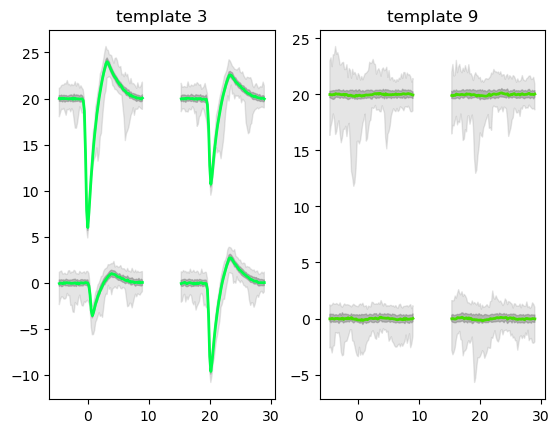

In [18]:
model, model_info = sc.load_model(
    model_folder=model_folder,
    trusted=['numpy.dtype'] # Specify which modules are trusted
)

labels_and_probababilities = si.auto_label_units(
    sorting_analyzer=analyzer,
    model_folder=model_folder,
    trust_model=True
)

""" 
# We can load a pretrained model from HuggingFace instead of training one
model, model_info = sc.load_model(
    sorting_analyzer = analyzer,
    repo_id = "SpikeInterface/toy_tetrode_model",
    trusted = ['numpy.dtype']
)


# The returned labels and probabilities are stored in the sorting analyzer
labels = analyzer.sorting.get_property("classifier_label")
probabilities = analyzer.sorting.get_property("classifier_probability")
"""

print(labels_and_probababilities)

sw.plot_unit_templates(analyzer, unit_ids=['3','9'])


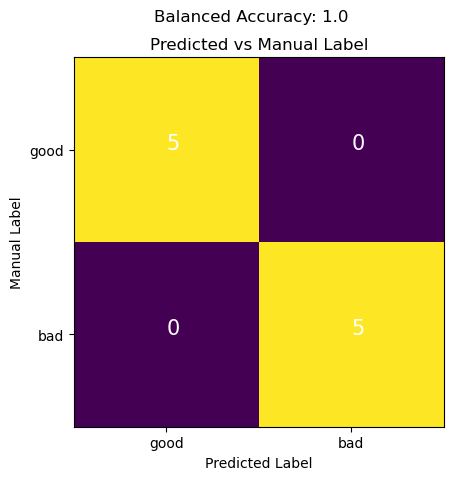

In [19]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

label_conversion = model_info['label_conversion']
predictions = labels_and_probababilities['prediction']

conf_matrix = confusion_matrix(manual_labels, predictions)

# Calculate balanced accuracy for the confusion matrix
balanced_accuracy = balanced_accuracy_score(manual_labels, predictions)

plt.imshow(conf_matrix)
for (index, value) in np.ndenumerate(conf_matrix):
    plt.annotate( str(value), xy=index, color="white", fontsize="15")
plt.xlabel('Predicted Label')
plt.ylabel('Manual Label')
plt.xticks(ticks = [0, 1], labels = list(label_conversion.values()))
plt.yticks(ticks = [0, 1], labels = list(label_conversion.values()))
plt.title('Predicted vs Manual Label')
plt.suptitle(f"Balanced Accuracy: {balanced_accuracy}")
plt.show()

### Apply Model

In [39]:
const = 1
for stream_id in tqdm(stream_ids):
    """
    h5 = h5py.File(path)
    rec_name = list(h5['wells'][stream_id].keys())[0]
    rec = si.MaxwellRecordingExtractor(path, stream_id=stream_id, rec_name=rec_name)

    path_to_sorting = Path(save_root) / stream_id / 'sorter_output'
    sorting = si.read_kilosort(folder_path=path_to_sorting)
    """

    rec, sorting_1 = si.generate_ground_truth_recording(num_channels=4, seed=const, num_units=5)
    _, sorting_2 =si.generate_ground_truth_recording(num_channels=4, seed=const+1, num_units=5)
    const += 2

    sorting = si.aggregate_units([sorting_1, sorting_2])

    analyzer = si.create_sorting_analyzer(sorting=sorting, recording=rec)
    analyzer.compute(['noise_levels','random_spikes','waveforms','templates', 'spike_locations','spike_amplitudes','correlograms','principal_components','quality_metrics','template_metrics'])
    analyzer.compute('template_metrics', include_multi_channel_metrics=True)

    labels_and_probababilities = si.auto_label_units(
        sorting_analyzer=analyzer,
        #model_folder=model_folder,
        repo_id="SpikeInterface/UnitRefine_sua_mua_classifier",
        trust_model=True
    )

    labels_and_probababilities = pd.DataFrame(labels_and_probababilities)
    #labels_and_probababilities.to_csv(path_to_sorting / 'labels_and_probabilities.csv')
    labels_and_probababilities.to_csv('labels_and_probabilities.csv')

Projecting waveforms: 100%|██████████| 10/10 [00:00<00:00, 1033.59it/s]
Compute : spike_locations + spike_amplitudes (no parallelization): 100%|██████████| 10/10 [00:00<00:00, 141.82it/s]
  0%|          | 0/24 [00:02<?, ?it/s]


ValueError: ('Input data does not contain all required metrics for classification', "Missing metrics: {'rp_contamination', 'rp_violations'}")